##Import packages and read csv file.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('Student Mental health.csv')   # first column is used as index
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [7]:
df.shape

(101, 11)

In [8]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [9]:
age_mean = np.mean(df['Age'])
print("Mean of age: ", age_mean)

age_std = np.std(df['Age'])
print("Standard deviation of age: ", age_std)

Mean of age:  20.53
Standard deviation of age:  2.483767299889424


## Data Pre-Processing


In [10]:
#Locate missing data
print(df.isnull().sum())
df.info()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                        

In [11]:
#Locate row with Null value
df[df.isnull().any(axis=1)]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [12]:
#Drop null value
df= df[df['Age'].notna()]
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [13]:
#Start Data Cleaning
#Drop column timestamp because it will be unused in this experiment.
df = df.drop(columns = "Timestamp")
df.head(1)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [14]:
df.head(1)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [15]:
#Rename columns to shorter attributes
df.rename(columns = {'Choose your gender':'Gender',
                     'What is your course?':'Course',
                     'Your current year of Study': 'Course Year',
                     'What is your CGPA?': 'CGPA',
                     'Marital status': 'Married',
                     'Do you have Depression?': 'Depression',
                     'Do you have Anxiety?': 'Anxiety',
                     'Do you have Panic attack?': 'Panic Attack',
                     'Did you seek any specialist for a treatment?': 'Seek Treatment'},inplace = True)
df.head(1)

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [16]:
#Formatting the Year column
df['Course Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [17]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
df["Course Year"] = df["Course Year"].apply(Clean)
df.head(3)

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [18]:
#Formatting the course value in column
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [19]:
len(df['Course'].unique())

49

In [20]:
#Replace same courses to the standard course name
df['Course'].replace({
    #Engineering
    'engin': 'Engineering' , 
    'Engine':'Engineering' , 
    'KOE': 'Engineering', #Kulliyah of Engineering
    'koe': 'Engineering', 
    'Koe' : 'Engineering',

    #Islamic Education
    'Islamic education': 'Islamic Education', 
    'Pendidikan Islam ': 'Islamic Education',
    'Pendidikan islam': 'Islamic Education', 
    'Pendidikan Islam': 'Islamic Education', 
    'Usuluddin ': 'Islamic Education',
    'Fiqh fatwa ': 'Islamic Education', #Master of Islamic Revealed Knowledge and Heritage in Fiqh and Usul al-Fiqh
    'Fiqh': 'Islamic Education',

    #IT
    'BIT': 'IT', 
    'BCS': 'IT',

    #Law
    'Laws': 'Law', 

    #Human Science
    'Human Resources': 'Human Science',
    'Irkhs': 'Human Science', #Kulliyyah of Islamic Revealed Knowledge and Human Sciences
    'KIRKHS': 'Human Science',
    'Kirkhs': 'Human Science',
    'BENL': 'Human Science',
    'Benl': 'Human Science',
    'Human Sciences ': 'Human Science',


    #Psychology
    'psychology':'Psychology', 

    #Economics
    'KENMS': 'Economics', #Kulliyyah of Economics and Management Sciences
    'ENM' : 'Economics',
    'Econs': 'Economics',

    #Marine Science
    'Marine science': 'Marine Science',

    #Accounting
    'Accounting ': 'Accounting',

    #Finance
    'Banking Studies': 'Finance',

    #Education
    'TAASL': 'Education', #Teaching Arabic as Second Language
    'ALA': 'Education', #Arabic Language & Literature
    'DIPLOMA TESL': 'Education',

    #Biomedicine
    'Biomedical science': 'Biomedicine',

    #Mathematics
    'CTS': 'Mathemathics', #Bachelor of Mathematical Sciences

    #Research
    'MHSC': 'Research',

    #Communication
    'Malcom': 'Communication',
    'Communication ': 'Communication',

    #Pharmacy
    'Kop': 'Pharmacy', #Kulliyyah of Pharmacy (KOP)

    #Nursing
    'Diploma Nursing': 'Nursing',
    'Nursing ': 'Nursing',
    } , inplace = True)

len(df['Course'].unique())

20

In [21]:
df['Course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Human Science', 'Psychology', 'Economics', 'Accounting',
       'Marine Science', 'Finance', 'Business Administration',
       'Education', 'Biomedicine', 'Research', 'Communication',
       'Pharmacy', 'Biotechnology', 'Nursing', 'Radiography'],
      dtype=object)

In [22]:
#Formatting the CGPA value in column
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [23]:
def remove_space(string):
    string = string.strip()
    return string
df["CGPA"] = df["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(df["CGPA"][:3], "\n")
print(df['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [24]:
df['CGPA'].replace({'0 - 1.99': 1,
                    '2.00 - 2.49': 2,
                    '2.50 - 2.99': 3,
                    '3.00 - 3.49': 4,
                    '3.50 - 4.00': 5},inplace=True)
df

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
0,Female,18.0,Engineering,1,4,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,4,No,No,Yes,No,No
2,Male,19.0,IT,1,4,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,4,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,4,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,IT,1,5,No,No,Yes,No,No
97,Male,18.0,Engineering,2,4,No,Yes,Yes,No,No
98,Female,19.0,Nursing,3,5,Yes,Yes,No,Yes,No
99,Female,23.0,Islamic Education,4,5,No,No,No,No,No


In [25]:
df['CGPA'].unique()

array([4, 5, 3, 2, 1])

In [26]:
#Finish data cleaning process
#Final check
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          100 non-null    object 
 1   Age             100 non-null    float64
 2   Course          100 non-null    object 
 3   Course Year     100 non-null    int64  
 4   CGPA            100 non-null    int64  
 5   Married         100 non-null    object 
 6   Depression      100 non-null    object 
 7   Anxiety         100 non-null    object 
 8   Panic Attack    100 non-null    object 
 9   Seek Treatment  100 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.6+ KB


,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
0,Female,18.0,Engineering,1,4,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,4,No,No,Yes,No,No
2,Male,19.0,IT,1,4,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,4,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,4,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,IT,1,5,No,No,Yes,No,No
97,Male,18.0,Engineering,2,4,No,Yes,Yes,No,No
98,Female,19.0,Nursing,3,5,Yes,Yes,No,Yes,No
99,Female,23.0,Islamic Education,4,5,No,No,No,No,No


## Exploratory Data Analysis


In [27]:
df.describe()

,Age,Course Year,CGPA
count,100.00000,100.000000,100.000000
mean,20.53000,1.980000,4.310000
std,2.49628,0.994734,0.884148
min,18.00000,1.000000,1.000000
25%,18.00000,1.000000,4.000000
50%,19.00000,2.000000,4.000000
75%,23.00000,3.000000,5.000000
max,24.00000,4.000000,5.000000


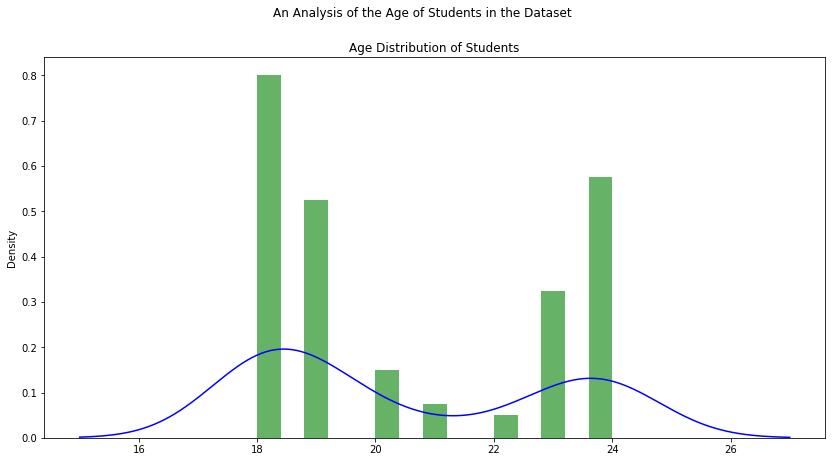

In [28]:
plt.figure(figsize=(14,7))
plt.title("Age Distribution of Students")
plt.suptitle("An Analysis of the Age of Students in the Dataset")
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
df["Age"].plot(kind='density', color='blue')
plt.show()

In [29]:
#Create new column which groups up students with mental health issues and without mental health issues in two separate columns.

#Students with Mental Health Issue
df_MH = df.loc[
(df["Depression"]=="Yes") |
(df["Anxiety"]=="Yes") |
(df["Panic Attack"]=="Yes"),
'Mental_Health_Issue']= 'Positive'

#Students without Mental Health Issue
df_MH = df.loc[
(df["Depression"]=="No") &
(df["Anxiety"]=="No") &
(df["Panic Attack"]=="No"),
'Mental_Health_Issue']= 'Negative'

In [30]:
# Creating a dataframe with students who have mental health issues or not
Positive_MH = df[df["Mental_Health_Issue"] == 'Positive']
Negative_MH = df[df["Mental_Health_Issue"] == 'Negative']

# Showing the count of Students grouped via Mental Health Issues
df.groupby(['Mental_Health_Issue']).count()

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
Mental_Health_Issue,,,,,,,,,,
Negative,36,36,36,36,36,36,36,36,36,36
Positive,64,64,64,64,64,64,64,64,64,64


In [31]:
course_counts = df["Course"].value_counts()

# Find the most common course
common_course = course_counts.idxmax()

print("The most common course in the dataset is:", common_course)


The most common course in the dataset is: IT


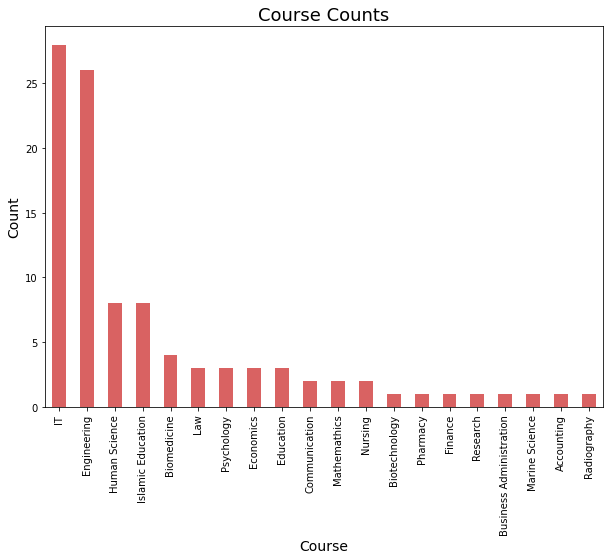

In [32]:
course_counts.plot(kind='bar',figsize=(10,7), color='#D96262')

# Add a title and x and y labels
plt.title("Course Counts", fontsize = 18)
plt.xlabel("Course", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xlabel("Course")
plt.ylabel("Count")

# Display the plot
plt.show()

In [33]:
# Create a subset of the dataset that only includes participants with mental health conditions
mental_health_data = df[(df["Depression"] == "Yes") | (df["Anxiety"] == "Yes") | (df["Panic Attack"] == "Yes")]

# Create a variable that contains the count of participants who seek treatment in the subset
treatment_counts = mental_health_data["Seek Treatment"].value_counts()

# Find the proportion of participants who seek treatment in the subset
treatment_proportion = treatment_counts[1] / treatment_counts.sum()

print(f"The proportion of participants who seek treatment for mental health conditions in the dataset is: {treatment_proportion*100}%")

The proportion of participants who seek treatment for mental health conditions in the dataset is: 9.375%


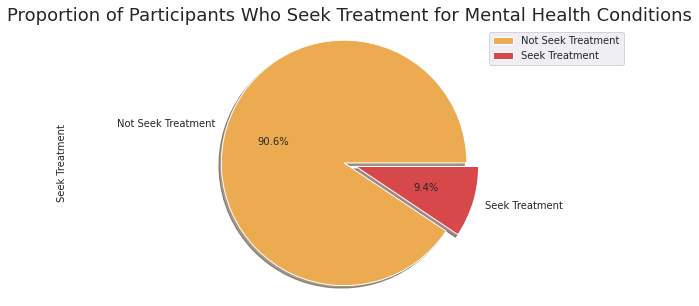

In [34]:
# Plotting the proportion of participants who seek treatment in a pie chart
sns.set_style('darkgrid')
treatment_counts.plot.pie(labels = ['Not Seek Treatment', 'Seek Treatment'], autopct = '%.1f%%', 
        explode = [0.1, 0], colors = ['#ECAB51', '#D7484A'], shadow = True, figsize=(10,5))
plt.title('Proportion of Participants Who Seek Treatment for Mental Health Conditions', fontsize = 18)
plt.legend(['Not Seek Treatment', 'Seek Treatment'], loc = 'upper right')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


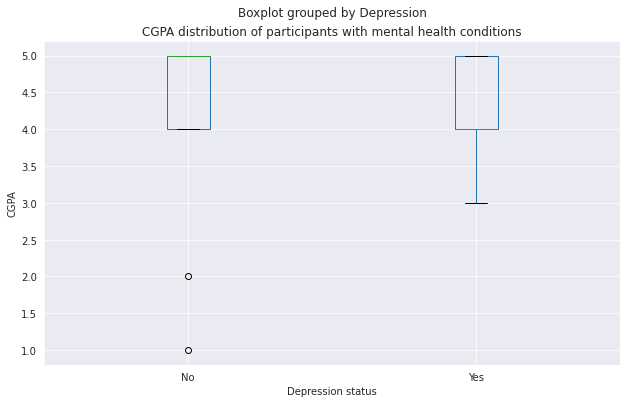

In [35]:
# Create a box plot of the CGPA distribution of participants with mental health conditions
mental_health_data.boxplot(column='CGPA', by='Depression', figsize=(10, 6))

# Add labels and title
plt.xlabel("Depression status")
plt.ylabel("CGPA")
plt.title("CGPA distribution of participants with mental health conditions")

# Show the plot
plt.show()

In [36]:
# Creating a series where the count of student's MH Issues is grouped by course
mental_health_no_course = Negative_MH.groupby("Course")["Mental_Health_Issue"].count()
mental_health_yes_course = Positive_MH.groupby("Course")["Mental_Health_Issue"].count()

# Sorting from highest to lowest 
mental_health_no_course = mental_health_no_course.sort_values(ascending = False)
mental_health_yes_course = mental_health_yes_course.sort_values(ascending = False)

# Creating a new dataframe for this plot
MH_Group = pd.concat([mental_health_yes_course, mental_health_no_course], axis=1)

# Renaming the column names
MH_Group.columns.values[0] = "Has Mental Health Issues"
MH_Group.columns.values[1] = "No Mental Health Issues"

# Changing the NULL values into 0 and then creating a new column named Total.
MH_Group.fillna(0, inplace = True)
MH_Group['Total'] = MH_Group['Has Mental Health Issues'] + MH_Group['No Mental Health Issues']

# Sorting
MH_Group = MH_Group.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=False)

MH_Group = MH_Group.reset_index(level=0)

MH_Group.head()

,Course,Has Mental Health Issues,No Mental Health Issues,Total
0,IT,21.0,7.0,28.0
1,Engineering,17.0,9.0,26.0
2,Human Science,4.0,4.0,8.0
3,Islamic Education,4.0,4.0,8.0
4,Biomedicine,0.0,4.0,4.0


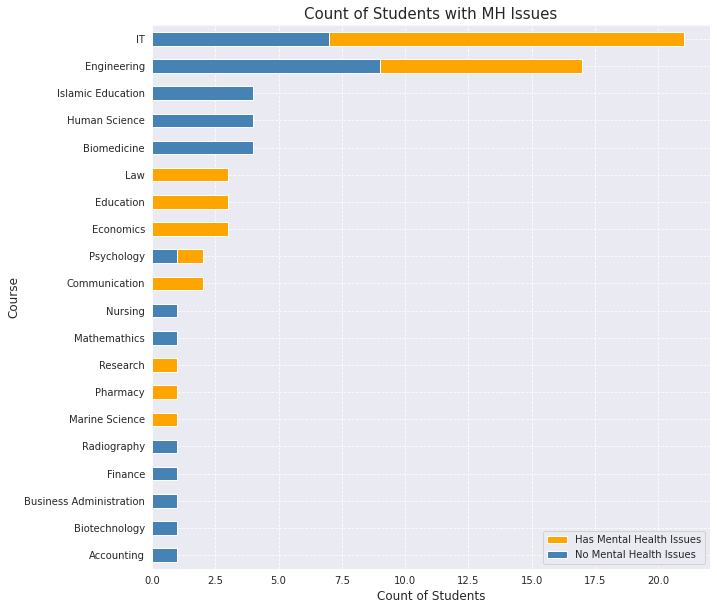

In [37]:
# Sorting Data for this plot
MH_Group = MH_Group.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=True)

# Plotting via stacked horizontal bars
ax = MH_Group.plot(x="Course", y="Has Mental Health Issues", kind="barh", color = 'orange', figsize=(10,10))

MH_Group.plot(x="Course", y="No Mental Health Issues", kind="barh", ax=ax, color = 'steelblue')
plt.title('Count of Students with MH Issues', fontsize=15)
plt.xlabel('Count of Students', fontsize=12)
plt.ylabel('Course', fontsize=12)
plt.grid(True, linestyle='--')

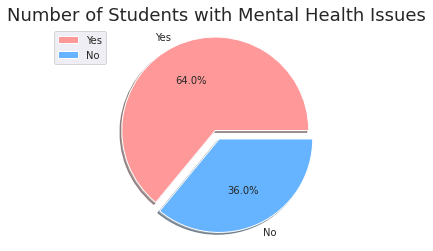

In [38]:
# Plotting the number of students who have MH Issues vs students with no MH Issues
sns.set_style('darkgrid')
plt.pie(df['Mental_Health_Issue'].value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', 
        explode = [0.1, 0], colors = ['#ff9999', '#66b3ff'], shadow = True)
plt.title('Number of Students with Mental Health Issues', fontsize = 18)
plt.legend(['Yes', 'No'], loc = 'upper left')
plt.axis('equal')
plt.show()

In [39]:
# Create a variable that contains the count of depression cases
depression_count = df["Depression"].value_counts()

# Create a variable that contains the count of anxiety cases
anxiety_count = df["Anxiety"].value_counts()

# Create a variable that contains the count of panic attack cases
panic_attack_count = df["Panic Attack"].value_counts()

# Print the distribution of mental health conditions
print("Distribution of Depression:")
print(depression_count)
print("\nDistribution of Anxiety:")
print(anxiety_count)
print("\nDistribution of Panic Attack:")
print(panic_attack_count)

Distribution of Depression:
No     65
Yes    35
Name: Depression, dtype: int64

Distribution of Anxiety:
No     66
Yes    34
Name: Anxiety, dtype: int64

Distribution of Panic Attack:
No     67
Yes    33
Name: Panic Attack, dtype: int64


In [40]:
#Percentage of Student with Depression
depressed = df['Depression'][df['Depression']=='Yes'].count()

percent = (depressed/df.shape[0])*100
percent

35.0

In [41]:
#Percentage of Student with Anxiety
anxious = df['Anxiety'][df['Anxiety']=='Yes'].count()

percent = (anxious/df.shape[0])*100
percent

34.0

In [42]:
#Percentage of Student with Panic Attack
panic_attack = df['Panic Attack'][df['Panic Attack']=='Yes'].count()

percent = (panic_attack/df.shape[0])*100
percent

33.0

In [43]:
#creating a dataframe of students facing all three problems
studentswithallsymptoms= df[df[['Depression','Anxiety','Panic Attack']].nunique(axis=1)==1]
studentswithallsymptoms[df['Depression']=='Yes']

<ipython-input-43-c3a182b7337a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  studentswithallsymptoms[df['Depression']=='Yes']


,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment,Mental_Health_Issue
2,Male,19.0,IT,1,4,No,Yes,Yes,Yes,No,Positive
17,Female,24.0,Economics,4,4,Yes,Yes,Yes,Yes,No,Positive
19,Female,18.0,Marine Science,2,5,Yes,Yes,Yes,Yes,No,Positive
24,Female,23.0,IT,3,5,No,Yes,Yes,Yes,No,Positive
28,Female,24.0,IT,3,5,Yes,Yes,Yes,Yes,Yes,Positive
34,Female,19.0,IT,1,4,No,Yes,Yes,Yes,No,Positive
37,Female,19.0,IT,1,3,No,Yes,Yes,Yes,No,Positive
53,Female,20.0,Engineering,3,4,Yes,Yes,Yes,Yes,No,Positive
80,Female,24.0,Communication,2,5,Yes,Yes,Yes,Yes,No,Positive
87,Female,18.0,Psychology,1,5,No,Yes,Yes,Yes,No,Positive


<function matplotlib.pyplot.show(*args, **kw)>

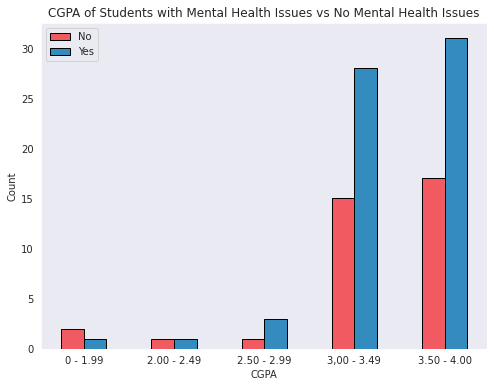

In [44]:
plt.figure(figsize=(8, 6))
Negative_CGPA = Negative_MH.groupby("CGPA")["Mental_Health_Issue"].count()
Positive_CGPA = Positive_MH.groupby("CGPA")["Mental_Health_Issue"].count()

n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, Negative_CGPA, color='#F15A61',
        width = width, edgecolor = 'black',
        label='No')
plt.bar(r + width, Positive_CGPA, color='#348CBE',
        width = width, edgecolor = 'black',
        label='Yes')

plt.xlabel("CGPA")
plt.ylabel('Count')
plt.title("CGPA of Students with Mental Health Issues vs No Mental Health Issues")
plt.grid()
plt.xticks(r + width/2,['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3,00 - 3.49', '3.50 - 4.00'])
plt.legend()

plt.show


In [45]:
# Creating a dataframe for students who are Seeking Treatment
student_treatment = df[df["Seek Treatment"] == 'Yes']

# Getting the avrage of each group.
total_ave = df["CGPA"].mean()
mh_average = Positive_MH['CGPA'].mean()
treatment_average = student_treatment['CGPA'].mean()

print(f'''The average of each total group is:
            Total Students: {total_ave}
            Students with MH Issues: {mh_average}
            Students Seeking Treatment: {treatment_average}''')

The average of each total group is:
            Total Students: 4.31
            Students with MH Issues: 4.359375
            Students Seeking Treatment: 4.333333333333333


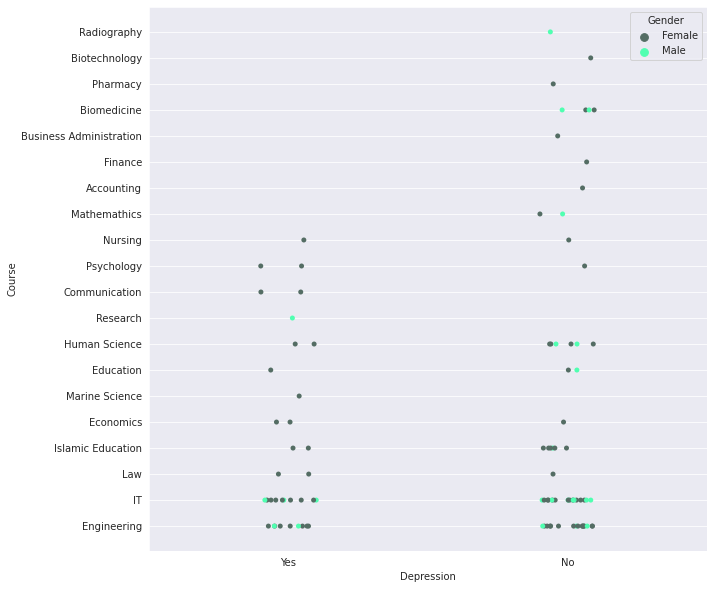

In [46]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Depression', y = 'Course', hue = 'Gender', data = df, palette = ['#546D64', '#50FFB1'])
plt.show()

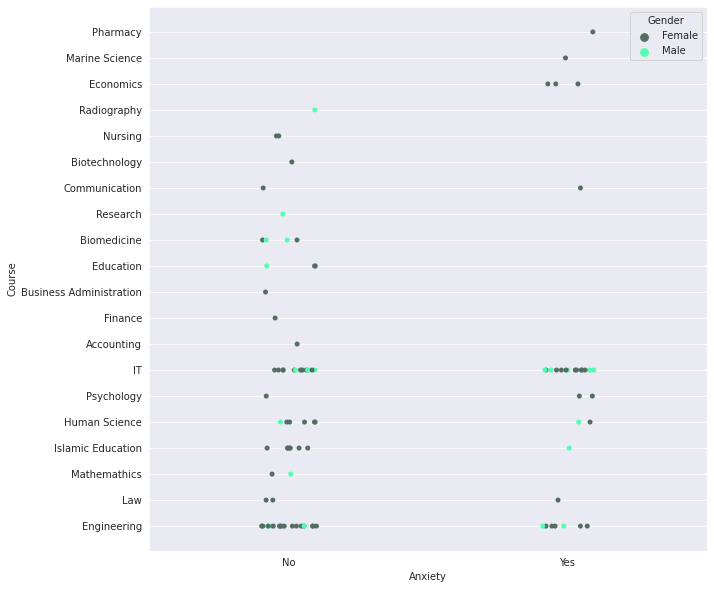

In [47]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = df, palette = ['#546D64', '#50FFB1'])
plt.show()

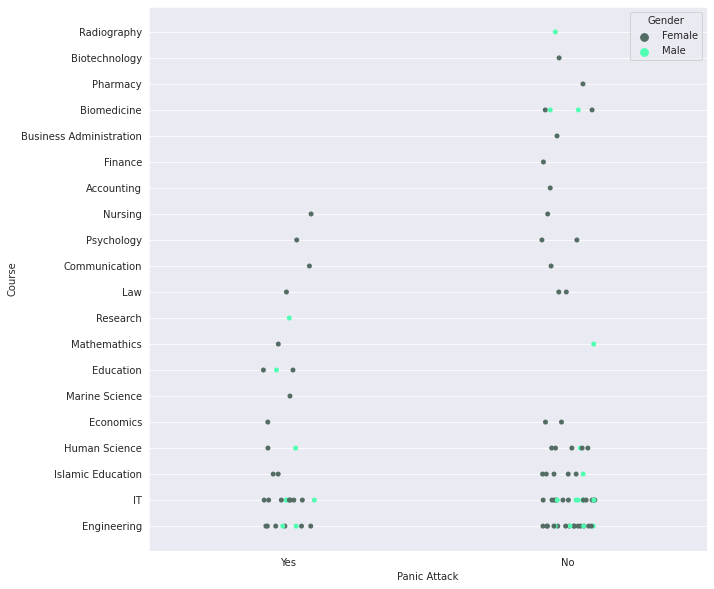

In [48]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Panic Attack', y = 'Course', hue = 'Gender', data = df, palette = ['#546D64', '#50FFB1'])
plt.show()

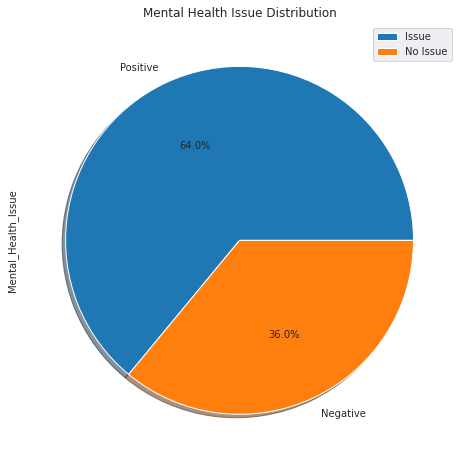

In [49]:
# Show the percentage of Students facing mental health issue in Dataset

plt.figure(figsize=(12,8))

df['Mental_Health_Issue'].value_counts().plot.pie(autopct='%1.1f%%', title='Mental Health Issue Distribution', shadow=True)
plt.legend(['Issue', 'No Issue'])

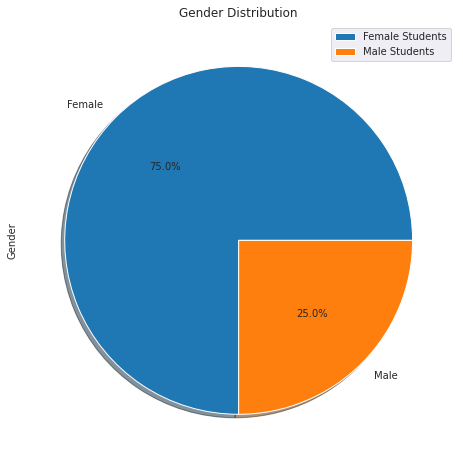

In [50]:
# Show the percentage Gender in Dataset

plt.figure(figsize=(12,8))

df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', title='Gender Distribution', shadow=True)
plt.legend(['Female Students', 'Male Students'])

## Correlation Analysis

In [51]:
df

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment,Mental_Health_Issue
0,Female,18.0,Engineering,1,4,No,Yes,No,Yes,No,Positive
1,Male,21.0,Islamic Education,2,4,No,No,Yes,No,No,Positive
2,Male,19.0,IT,1,4,No,Yes,Yes,Yes,No,Positive
3,Female,22.0,Law,3,4,Yes,Yes,No,No,No,Positive
4,Male,23.0,Mathemathics,4,4,No,No,No,No,No,Negative
...,...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,IT,1,5,No,No,Yes,No,No,Positive
97,Male,18.0,Engineering,2,4,No,Yes,Yes,No,No,Positive
98,Female,19.0,Nursing,3,5,Yes,Yes,No,Yes,No,Positive
99,Female,23.0,Islamic Education,4,5,No,No,No,No,No,Negative


In [52]:
wh1 = df[['Gender','Age','Course','Course Year', 'CGPA', 
            'Married','Depression','Anxiety', 'Panic Attack', 'Seek Treatment']]

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in wh1.columns if wh1.dtypes[x] == 'object']
for column in categorical_columns:
    wh1[column] = encoder.fit_transform(df[column])
wh1

<ipython-input-53-7333abe53465>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wh1[column] = encoder.fit_transform(df[column])


,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
0,0,18.0,7,1,4,0,1,0,1,0
1,1,21.0,11,2,4,0,0,1,0,0
2,1,19.0,10,1,4,0,1,1,1,0
3,0,22.0,12,3,4,1,1,0,0,0
4,1,23.0,14,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,10,1,5,0,0,1,0,0
97,1,18.0,7,2,4,0,1,1,0,0
98,0,19.0,15,3,5,1,1,0,1,0
99,0,23.0,11,4,5,0,0,0,0,0


In [54]:
wh1.describe()

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.250000,20.53000,8.910000,1.980000,4.310000,0.160000,0.350000,0.340000,0.330000,0.060000
std,0.435194,2.49628,3.621192,0.994734,0.884148,0.368453,0.479372,0.476095,0.472582,0.238683
min,0.000000,18.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,7.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,9.500000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,23.00000,10.000000,3.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,19.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


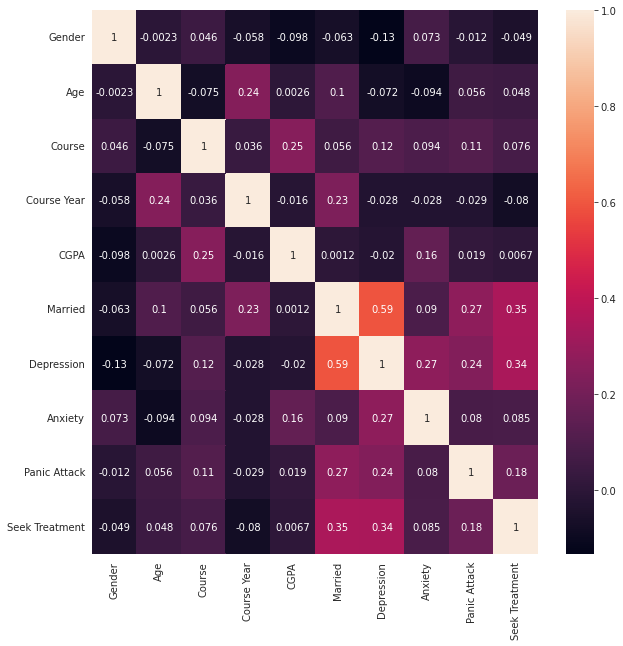

In [55]:
cor = wh1.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(cor,annot=True, cmap=None)

In [56]:
cor = wh1.corr()
display(cor)

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment
Gender,1.000000,-0.002324,0.046470,-0.058333,-0.098444,-0.062994,-0.133150,0.073127,-0.012278,-0.048622
Age,-0.002324,1.000000,-0.075125,0.244315,0.002609,0.104551,-0.072171,-0.093661,0.055741,0.047808
Course,0.046470,-0.075125,1.000000,0.035950,0.251731,0.056325,0.117251,0.094095,0.111971,0.076431
Course Year,-0.058333,0.244315,0.035950,1.000000,-0.015849,0.229297,-0.027538,-0.028154,-0.028793,-0.079982
CGPA,-0.098444,0.002609,0.251731,-0.015849,1.000000,0.001240,-0.020257,0.155017,0.018615,0.006701
Married,-0.062994,0.104551,0.056325,0.229297,0.001240,1.000000,0.594762,0.089828,0.273809,0.349168
Depression,-0.133150,-0.072171,0.117251,-0.027538,-0.020257,0.594762,1.000000,0.269978,0.243003,0.344298
Anxiety,0.073127,-0.093661,0.094095,-0.028154,0.155017,0.089828,0.269978,1.000000,0.079912,0.085334
Panic Attack,-0.012278,0.055741,0.111971,-0.028793,0.018615,0.273809,0.243003,0.079912,1.000000,0.180891
Seek Treatment,-0.048622,0.047808,0.076431,-0.079982,0.006701,0.349168,0.344298,0.085334,0.180891,1.000000


## Feature Selection

In [57]:
encoder = LabelEncoder()
categorical_columns= [x for x in df.columns if df.dtypes[x] == 'object']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
df

,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment,Mental_Health_Issue
0,0,18.0,7,1,4,0,1,0,1,0,1
1,1,21.0,11,2,4,0,0,1,0,0,1
2,1,19.0,10,1,4,0,1,1,1,0,1
3,0,22.0,12,3,4,1,1,0,0,0,1
4,1,23.0,14,4,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,10,1,5,0,0,1,0,0,1
97,1,18.0,7,2,4,0,1,1,0,0,1
98,0,19.0,15,3,5,1,1,0,1,0,1
99,0,23.0,11,4,5,0,0,0,0,0,0


In [58]:
# Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import normalize

data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()


,Gender,Age,Course,Course Year,CGPA,Married,Depression,Anxiety,Panic Attack,Seek Treatment,Mental_Health_Issue
0,0.000000,0.907980,0.353103,0.050443,0.201773,0.000000,0.050443,0.000000,0.050443,0.0,0.050443
1,0.041345,0.868243,0.454794,0.082690,0.165380,0.000000,0.000000,0.041345,0.000000,0.0,0.041345
2,0.045502,0.864530,0.455016,0.045502,0.182006,0.000000,0.045502,0.045502,0.045502,0.0,0.045502
3,0.000000,0.858956,0.468521,0.117130,0.156174,0.039043,0.039043,0.000000,0.000000,0.0,0.039043
4,0.036322,0.835398,0.508503,0.145287,0.145287,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [59]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Descriptor = ['Gender', 'Age', 'Course', 'Course Year','CGPA','Married']
Response = ['Depression', 'Anxiety', 'Panic Attack', 'Mental_Health_Issue']
# Load the data
data = df
X = data[Descriptor]
y = data[Response]

# Perform feature selection using chi-squared test
selector = SelectKBest(score_func=chi2, k=5) # select the top 3 features
X_new = selector.fit_transform(X, y)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3) # set the number of clusters
kmeans.fit(X_new)

# Print the selected features
print("Selected features:", [X.columns[i] for i in selector.get_support(indices=True)])


Selected features: ['Gender', 'Age', 'Course', 'CGPA', 'Married']


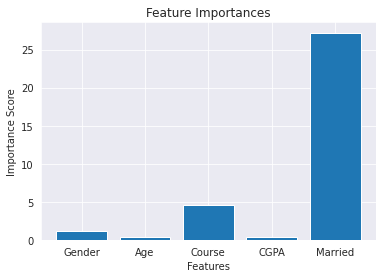

<Figure size 864x576 with 0 Axes>

In [60]:
importances = selector.scores_
selected_features = [X.columns[i] for i in selector.get_support(indices=True)]
plt.bar(selected_features, importances[selector.get_support()])
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.figure(figsize=(12,8))
plt.show()

In [61]:
kmeans.inertia_

907.3742424242424

In [62]:
kmeans.n_iter_

3

In [63]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_new, kmeans.labels_)
print("Silhouette score:", score)


Silhouette score: 0.41759380201235574


## Model Selection

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

# Load the data
data = df

#Select the features and response variable
X = data[['Gender', 'Age', 'Course', 'CGPA', 'Married']]
y = data['Mental_Health_Issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Random_Pipe = Pipeline([('RandomForest_Classifier',RandomForestClassifier())])

Regression_Pipe = Pipeline([('LogisticRegression_Classifier',LogisticRegression(random_state=42))])

DecisionTree_Pipe = Pipeline([ ('DecisionTree_Classifier',DecisionTreeClassifier(random_state=42))])

SVC_Pipe = Pipeline([('SVC_Classifier',SVC())])

pipelines = [Random_Pipe, Regression_Pipe, DecisionTree_Pipe, SVC_Pipe]

pipe_dict = {0: 'Random Forest', 1: 'Logistic Regression', 2: 'Decision Tree', 3: "SVC"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    #print("%s: %f " % (pipe_dict[i], cv_score.mean()))

# Create a dictionary containing the pipeline name and the corresponding cross-validation mean score
results = {'Pipeline': pipe_dict.values(), 'Accuracy': [cv_score.mean() for cv_score in cv_results_accuracy]}

# Create a dataframe from the dictionary
result_df = pd.DataFrame(results)

# Print the dataframe
result_df



,Pipeline,Accuracy
0,Random Forest,0.657143
1,Logistic Regression,0.671429
2,Decision Tree,0.614286
3,SVC,0.671429


In [65]:
from sklearn.metrics import roc_auc_score

# LogisticRegression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Calculate the predicted probabilities
lr_probs = lr_model.predict_proba(X_test)[:,1]

# Calculate AUC
lr_auc = roc_auc_score(y_test, lr_probs)

# Print the accuracy, recall, precision, f1 score and AUC of the model
lr_accuracy = accuracy_score(y_test, lr_predictions, normalize=True, sample_weight=None)
lr_recall = recall_score(y_test, lr_predictions, average="weighted")
lr_precision = precision_score(y_test, lr_predictions, average="weighted")
lr_f1_score = f1_score(y_test, lr_predictions, average="weighted")

print("========== linear Regression Results ==========")
print("Accuracy    : ", lr_accuracy)
print("Recall      : ", lr_recall)
print("Precision   : ", lr_precision)
print("F1 Score    : ", lr_f1_score)
print("AUC         : ", lr_auc)
print("===========================================")


========== linear Regression Results ==========
Accuracy    :  0.6666666666666666
Recall      :  0.6666666666666666
Precision   :  0.7093333333333334
F1 Score    :  0.6243386243386245
AUC         :  0.47058823529411764


In [66]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.64      0.94      0.76        17

    accuracy                           0.67        30
   macro avg       0.72      0.62      0.60        30
weighted avg       0.71      0.67      0.62        30



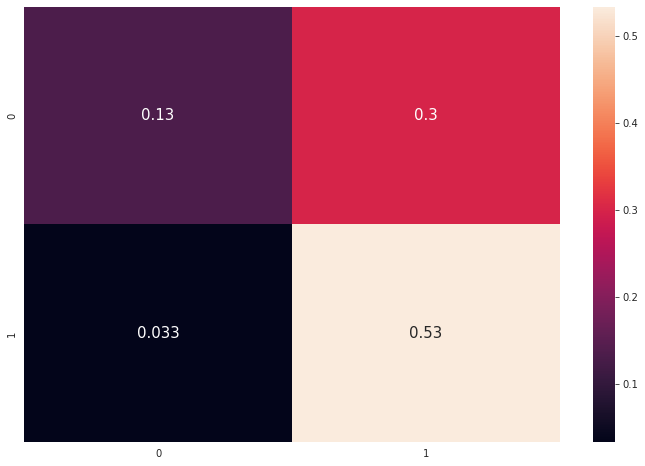

In [67]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

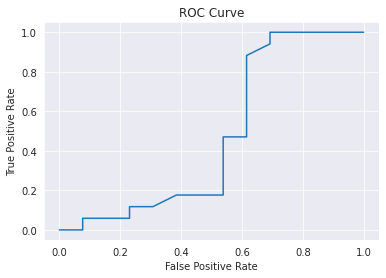

AUC:  0.47058823529411764


In [68]:
from sklearn.metrics import roc_curve, auc

# Fit the model on the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict_proba(X_test)[:,1]

# Compute the true positive rate and the false positive rate
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Compute the AUC
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

##Hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

# Initialize the logistic regression model with GridSearchCV
lr_model = LogisticRegression()
lr_grid = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5)

# Fit the model to the training data
lr_grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", lr_grid.best_params_)

# retrain model with the best parameters
best_lr_model = LogisticRegression(C = lr_grid.best_params_['C'], penalty = lr_grid.best_params_['penalty'])
best_lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = best_lr_model.predict(X_test)

# Print the accuracy, recall, precision and f1 score of the model
lr_grid_accuracy = accuracy_score(y_test, lr_predictions, normalize=True, sample_weight=None)
lr_grid_recall = recall_score(y_test, lr_predictions, average="weighted")
lr_grid_precision = precision_score(y_test, lr_predictions, average="weighted")
lr_grid_f1_score = f1_score(y_test, lr_predictions, average="weighted")
# Compute the AUC for the model with tuning
y_pred_proba = best_lr_model.predict_proba(X_test)[:,1]
lr_grid_auc = roc_auc_score(y_test, y_pred_proba)

print("========== linear Regression with hyperparameter tuning Results ==========")
print("Accuracy    : ", lr_grid_accuracy)
print("Recall      : ", lr_grid_recall)
print("Precision   : ", lr_grid_precision)
print("F1 Score    : ", lr_grid_f1_score)
print("AUC: ", lr_grid_auc)
print("==========================================================================")


Best parameters:  {'C': 0.1, 'penalty': 'l2'}
========== linear Regression with hyperparameter tuning Results ==========
Accuracy    :  0.7
Recall      :  0.7
Precision   :  0.8038461538461538
F1 Score    :  0.651983584131327
AUC:  0.4343891402714932


## Answer for predictive Question

In [70]:
# Create a new column to represent panic attack in binary form (1 = yes, 0 = no)
data['panic_attack_binary'] = data['Panic Attack'].apply(lambda x: 1 if x == 1 else 0)

# Create a new column to represent the year of study in binary form (1 = 3rd year, 0 = 1st year)
data['year_of_study_binary'] = data['Course Year'].apply(lambda x: 1 if x == 3 else 0)

# Use the crosstab function to create a table of counts for the year of study and panic attack columns
year_of_study_panic_attack_table = pd.crosstab(data['year_of_study_binary'], data['panic_attack_binary'],
                                               rownames=['Year of Study'], colnames=['Panic Attack'])

year_of_study_panic_attack_table.index = ["1st Year", "3rd Year"]

# Change the labels of the columns
year_of_study_panic_attack_table.columns = ["No", "Yes"]

# Add color formatting to the table using the background_gradient() function
year_of_study_panic_attack_table.style.background_gradient()

,No,Yes
1st Year,53,23
3rd Year,14,10


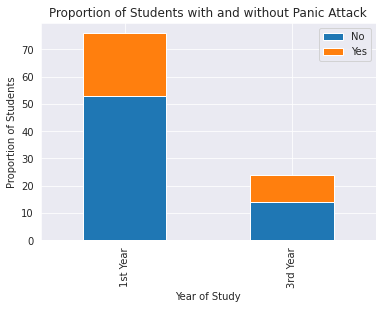

In [71]:
year_of_study_panic_attack_table.plot(kind='bar', stacked=True)
plt.xlabel('Year of Study')
plt.ylabel('Proportion of Students')
plt.title('Proportion of Students with and without Panic Attack')
plt.show()